# Pytorch Lab: GLM

## 1. Revisiting Linear Regression

### Example 6.2

In [ ]:
import torch
x=torch.tensor([10.3, 19.7, 15.4, 29.6, 20])/100

def n_loss_ftn(x):
    return -torch.sum(-torch.log(theta) - x/theta)

theta = torch.tensor(torch.exp(torch.randn(1)), requires_grad=True)


optimizer = torch.optim.SGD([theta], lr=0.001)

history = []

for i in range(100): # 그냥 100번 시뮬레이션, x는 항상 같음.
   loss = n_loss_ftn(x) # - log likelihood 계산
   loss.backward() # 미분해서 업뎃
   optimizer.step() # 이동
   optimizer.zero_grad() # 기울기 초기화
   history.append(loss.item()) # 결과 저장

/var/folders/1p/w6hpd8395gdb7ybzk5dvbcsw0000gn/T/ipykernel_5209/2792819528.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  theta = torch.tensor(torch.exp(torch.randn(1)), requires_grad=True)


In [3]:
torch.mean(x)

tensor(0.1900)

In [4]:
theta

tensor([0.1900], requires_grad=True)

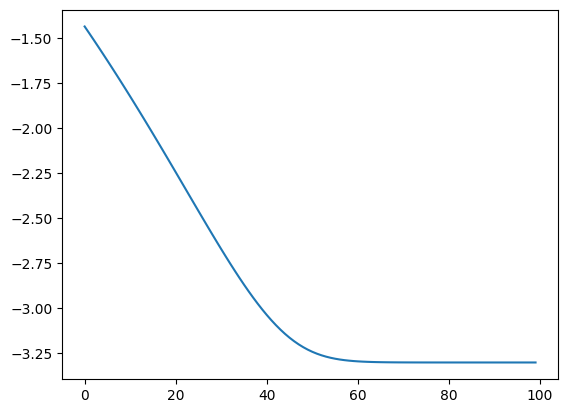

In [14]:
import matplotlib.pyplot as plt
plt.plot(history)

## Example 6.3

In [14]:
torch.manual_seed(123)
n = 200
x = torch.linspace(0.0, 10.0, steps=n)
y = 3.0 + 1.5 * x + torch.normal(mean=0.0, std=2.0, size=(n,))

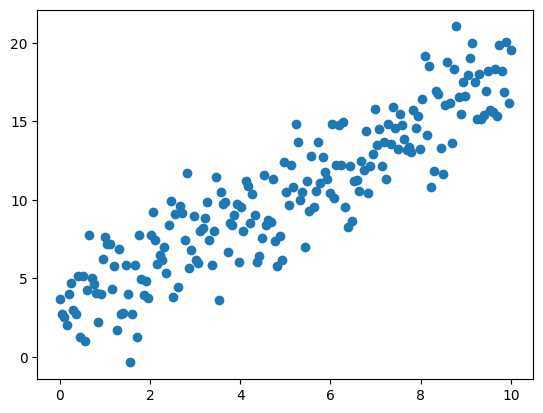

In [15]:
plt.scatter(x,y)

In [26]:
y.shape

torch.Size([200])

In [41]:
import torch

from torch.utils.data import Dataset, DataLoader, TensorDataset


train = TensorDataset(x, y)
dataloader = DataLoader(train, shuffle=True, batch_size=20)

def n_log_lik(x, y):
    u = betas[0] + betas[1] * x
    ll = -1/2*torch.log(torch.tensor(2)*torch.pi) -torch.log(sigma2)-(y-u)**2/2/sigma2
    return -torch.sum(ll)

betas = torch.tensor(torch.randn([2]), requires_grad=True)
init_value = torch.tensor(torch.randn([1]), requires_grad=True)
sigma2 = torch.tensor(torch.exp(init_value), requires_grad=True)
optimizer = torch.optim.SGD([betas, sigma2], lr=0.001)

history=[]

for i in range(100):
    LOSS=0
    for xx, yy in dataloader:
      loss= n_log_lik(xx, yy)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
      LOSS+=loss.item()
    history.append(LOSS)  

C:\Users\user\AppData\Local\Temp\ipykernel_9896\1139563280.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  betas = torch.tensor(torch.randn([2]), requires_grad=True)
C:\Users\user\AppData\Local\Temp\ipykernel_9896\1139563280.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  init_value = torch.tensor(torch.randn([1]), requires_grad=True)
C:\Users\user\AppData\Local\Temp\ipykernel_9896\1139563280.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sigma2 = torch.tensor(torch.exp(init_value), requires_grad=True)


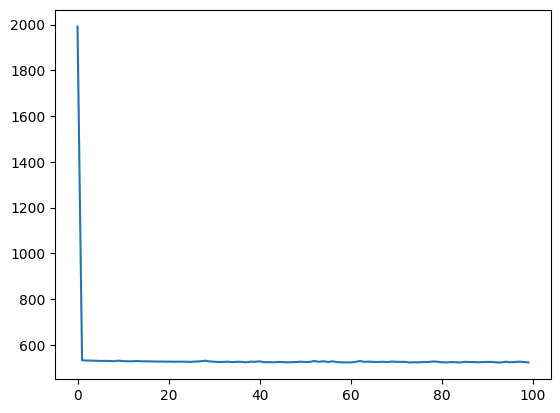

In [42]:
plt.plot(history)

In [43]:
betas

tensor([2.8417, 1.5349], requires_grad=True)

## Example 6.4

In [100]:
torch.manual_seed(452)
n = 1000 #first 400 are train and others are test
x1 = torch.randn(n)                    
x2 = torch.normal(mean=0.0, std=2.0, size=(n,))  
x3 = torch.bernoulli(torch.full((n,), 0.5))      

y = 2.0 + 0.8*x1 - 1.2*x2 + 3.0*x3 + torch.normal(mean=0.0, std=2.0, size=(n,))
ones = torch.ones([y.shape[0]])
X = torch.stack((ones, x1, x2, x3), dim=1)

In [101]:
X.shape

torch.Size([1000, 4])

In [118]:
train = TensorDataset(X[:900, :], y[:900].reshape([-1,1]))
dataloader = DataLoader(train, shuffle=True, batch_size=20)

def n_log_lik(X, y):
    u = X @ betas
    ll = -1/2*torch.log(torch.tensor(2)*torch.pi) - 0.5*torch.log(sigma**2)-(y-u)**2/2/sigma**2
    return -torch.sum(ll)

betas = torch.tensor(torch.randn([4,1]), requires_grad=True)
sigma = torch.tensor(torch.randn(1), requires_grad=True)
optimizer = torch.optim.SGD([betas, sigma], lr=0.001)

history=[]

for i in range(500):
    LOSS=0
    for xx, yy in dataloader:
      loss= n_log_lik(xx, yy)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
      LOSS+=loss.item()
    history.append(LOSS)  

C:\Users\user\AppData\Local\Temp\ipykernel_9896\853579505.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  betas = torch.tensor(torch.randn([4,1]), requires_grad=True)
C:\Users\user\AppData\Local\Temp\ipykernel_9896\853579505.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sigma = torch.tensor(torch.randn(1), requires_grad=True)


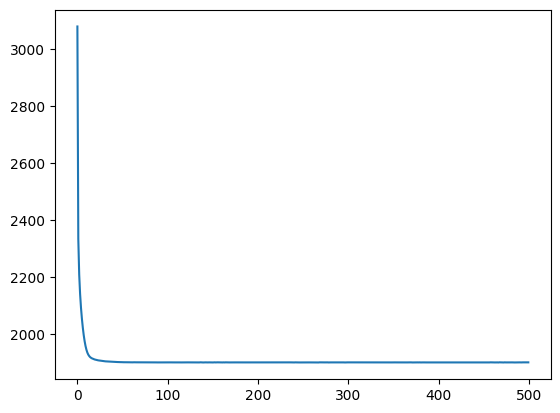

In [119]:
plt.plot(history)

In [120]:
betas

tensor([[ 2.0038],
        [ 0.8336],
        [-1.1788],
        [ 2.8958]], requires_grad=True)

In [121]:
sigma**2

tensor([4.0199], grad_fn=<PowBackward0>)

In [132]:
X.shape

torch.Size([1000, 4])

### Revisit Example 6.4: Solve it again using custom layer

In [164]:
class LinearModel(torch.nn.Module):
    def __init__(self, in_units):
        super().__init__()
        # Linear part (like MyLinear)
        self.weight = torch.nn.Parameter(torch.randn(in_units, 1))

    def forward(self, X):
        # returns μ = XW
        return X @ self.weight 

sigma = torch.tensor(torch.randn(1), requires_grad=True)
linear_model = LinearModel(4)

def n_log_lik(xx, y):
    u = linear_model(xx)
    ll = -1/2*torch.log(torch.tensor(2)*torch.pi) - 0.5*torch.log(sigma**2)-(y-u)**2/2/sigma**2
    return -torch.sum(ll)


C:\Users\user\AppData\Local\Temp\ipykernel_9896\2941088392.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sigma = torch.tensor(torch.randn(1), requires_grad=True)


In [165]:





optimizer = torch.optim.SGD(list(linear_model.parameters())+[sigma], lr=0.001)

history=[]

for i in range(500):
    LOSS=0
    for xx, yy in dataloader:
      loss= n_log_lik(xx, yy)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
      LOSS+=loss.item()
    history.append(LOSS)  

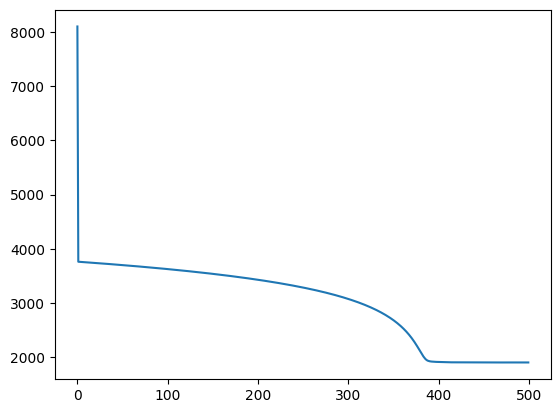

In [166]:
plt.plot(history)

In [167]:
linear_model.weight

Parameter containing:
tensor([[ 2.0075],
        [ 0.8316],
        [-1.1770],
        [ 2.8874]], requires_grad=True)

In [169]:
sigma

tensor([-2.0062], requires_grad=True)